In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
import os
from os.path import join
from pathlib import Path

path_nhts = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Zustandsverteilung.pickle"
path_sim = join(Path("."),"Zustandsverteilung_Simulation.pickle")

states_nhts = pickle.load(open(path_nhts, "rb"))
states_sim = pickle.load(open(path_sim, "rb"))

Text(0.5, 1.0, 'Anteil der Flotte im Fahrzustand')

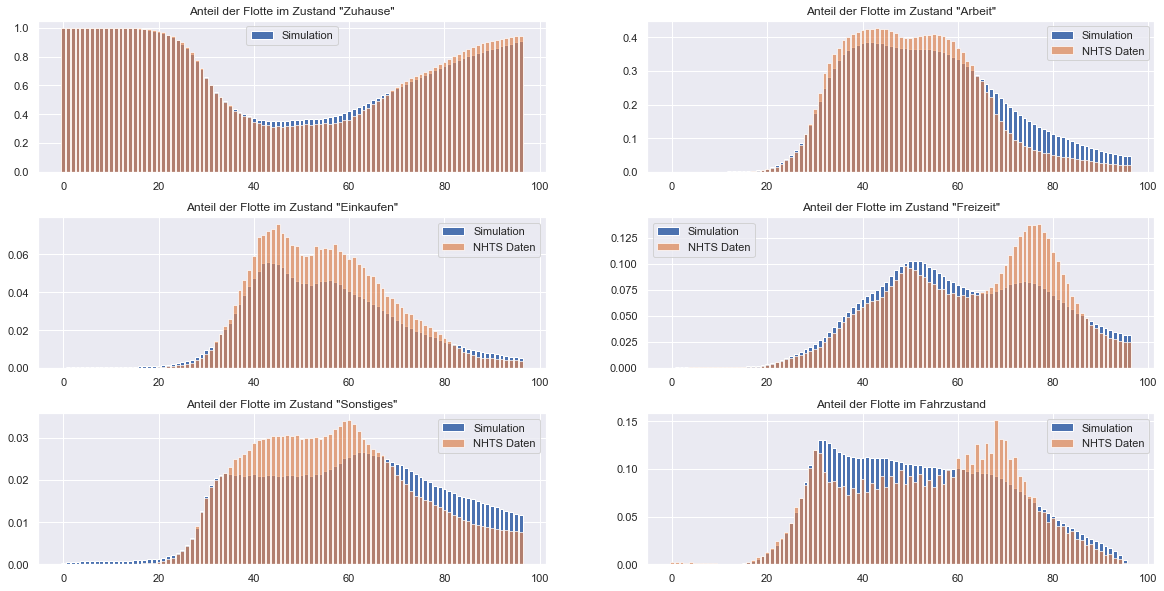

In [43]:
sns.set()
fig, axs = plt.subplots(3,2, figsize=(20,10))
plt.subplots_adjust(hspace=0.3)

x = np.linspace(0, 96, 97)

axs[0][0].bar(x, states_sim[1], label="Simulation")
axs[0][0].bar(x, states_nhts[1], alpha=0.7)
axs[0][0].legend()
axs[0][0].set_title("Anteil der Flotte im Zustand \"Zuhause\"")

axs[0][1].bar(x, states_sim[2], label="Simulation")
axs[0][1].bar(x, states_nhts[2], alpha=0.7, label="NHTS Daten")
axs[0][1].legend()
axs[0][1].set_title("Anteil der Flotte im Zustand \"Arbeit\"")

axs[1][0].bar(x, states_sim[3], label="Simulation")
axs[1][0].bar(x, states_nhts[3], alpha=0.7, label="NHTS Daten")
axs[1][0].legend()
axs[1][0].set_title("Anteil der Flotte im Zustand \"Einkaufen\"")

axs[1][1].bar(x, states_sim[4], label="Simulation")
axs[1][1].bar(x, states_nhts[4], alpha=0.7, label="NHTS Daten")
axs[1][1].legend()
axs[1][1].set_title("Anteil der Flotte im Zustand \"Freizeit\"")

axs[2][0].bar(x, states_sim[5], label="Simulation")
axs[2][0].bar(x, states_nhts[5], alpha=0.7, label="NHTS Daten")
axs[2][0].legend()
axs[2][0].set_title("Anteil der Flotte im Zustand \"Sonstiges\"")

axs[2][1].bar(x, states_sim[0], label="Simulation")
axs[2][1].bar(x, states_nhts[0], alpha=0.7, label="NHTS Daten")
axs[2][1].legend()
axs[2][1].set_title("Anteil der Flotte im Fahrzustand")

In [44]:
states_dif = [[0 for i in range(97) ] for i in range(6)]
for i in range(6):
    for j in range(97):
        states_dif[i][j] = states_sim[i][j] - states_nhts[i][j]

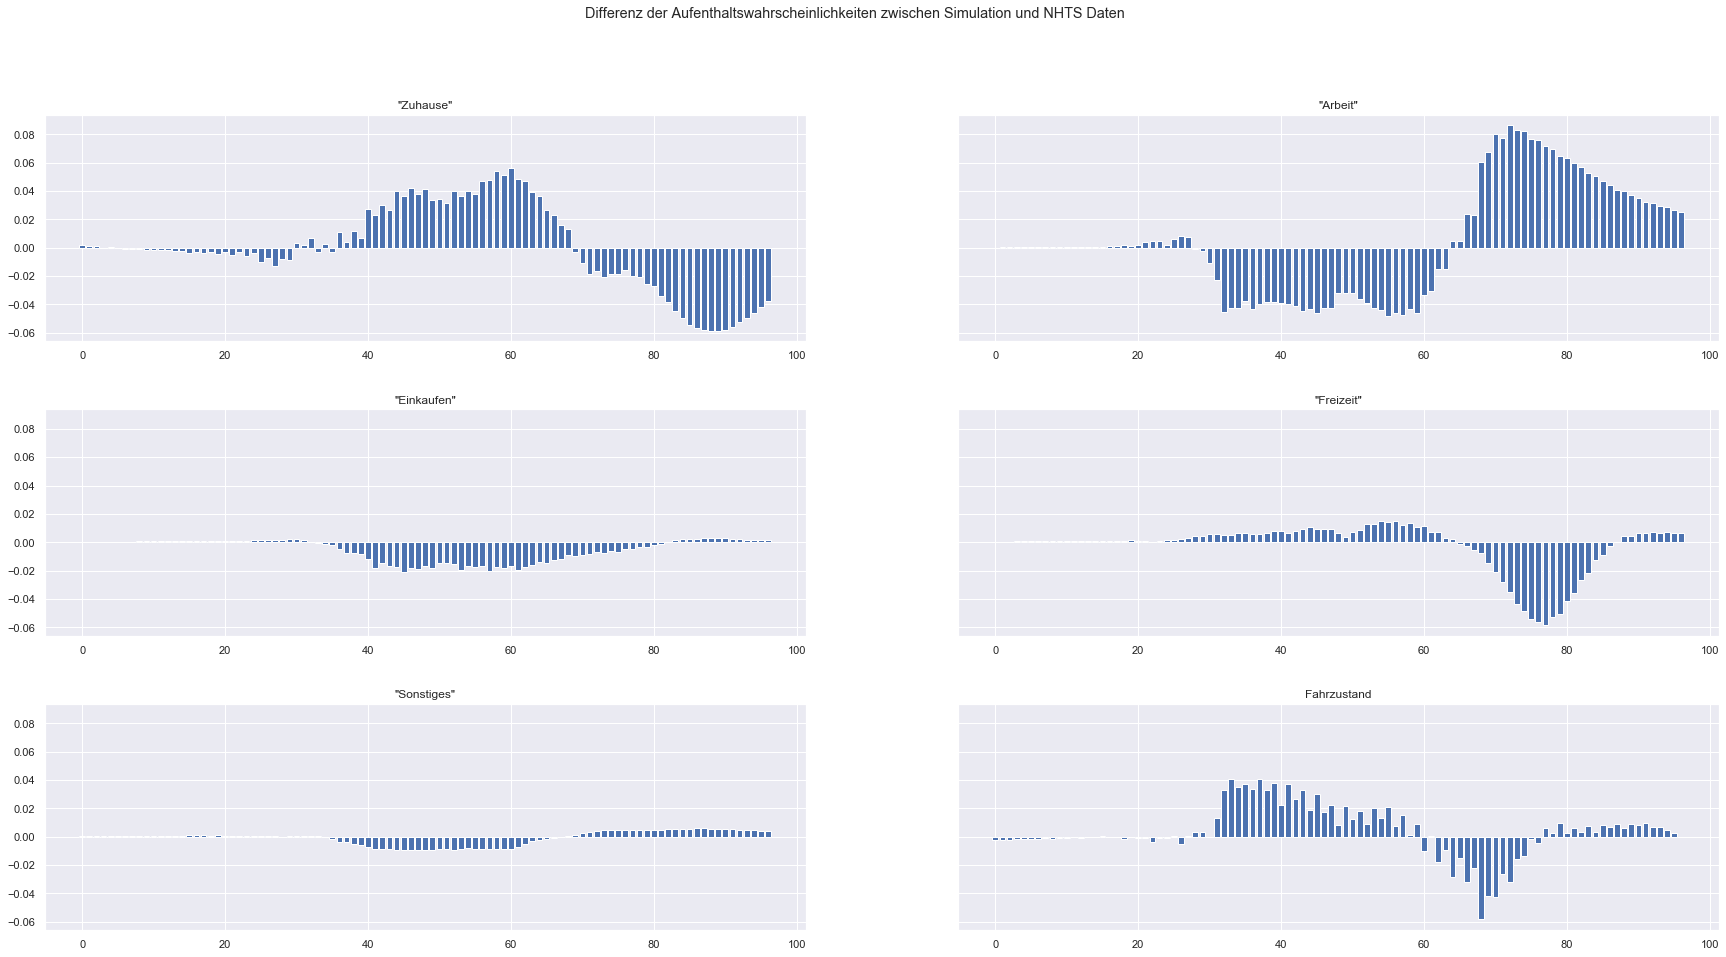

In [50]:
fig, axs = plt.subplots(3,2, figsize=(30,15), sharey=True)
plt.subplots_adjust(hspace=0.3)

x = np.linspace(0, 96, 97)

axs[0][0].bar(x, states_dif[1])
axs[0][0].set_title("\"Zuhause\"")

axs[0][1].bar(x, states_dif[2])
axs[0][1].set_title("\"Arbeit\"")

axs[1][0].bar(x, states_dif[3])
axs[1][0].set_title("\"Einkaufen\"")

axs[1][1].bar(x, states_dif[4])
axs[1][1].set_title("\"Freizeit\"")

axs[2][0].bar(x, states_dif[5])
axs[2][0].set_title("\"Sonstiges\"")

axs[2][1].bar(x, states_dif[0])
axs[2][1].set_title("Fahrzustand")

fig.suptitle("Differenz der Aufenthaltswahrscheinlichkeiten zwischen Simulation und NHTS Daten");

## Datenanalyse Unterschiede im Zustand "Arbeit"

In [53]:
df_sim = pd.read_csv(r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_9_WT_150k_CS3.csv")
df_nhts = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\NHTS_Trips_Werktag_CS3_Ladezeiten.pickle", "rb"))

## Vergleiche Trips zwischen Zeitschritten 30 und 50

In [54]:
df_sim.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,475.0,32,530.0,55.0,31.14,270.0,100.0,89.0,530.0,594.0
1,0.2,2,2,1,800.0,53,807.0,7.0,3.83,560.0,100.0,98.6,807.0,815.0
2,0.3,3,1,4,1367.0,91,1375.0,8.0,4.37,987.0,100.0,98.4,1375.0,1384.0
3,1.1,1,1,5,348.0,23,375.0,27.0,15.09,8.0,100.0,95.9,NaN,NaN
4,1.2,2,5,2,383.0,26,384.0,1.0,0.78,413.0,95.9,95.7,384.0,413.0


In [73]:
t_min = 30 
t_max = 50

In [74]:
filt = (df_sim["Departure_t"] > t_min) & (df_sim["Departure_t"] < t_max)
df_sim_filt = df_sim[filt]

filt = (df_nhts["Departure_t"] > t_min) & (df_nhts["Departure_t"] < t_max)
df_nhts_filt = df_nhts[filt]

In [75]:
no_cars_sim = len(df_sim[df_sim["Trip_no"] == 1])
no_cars_sim

150000

In [76]:
no_cars_nhts = len(df_nhts[df_nhts["Trip_no"] == 1])
no_cars_nhts

137003

In [77]:
no_trips_rel_sim = len(df_sim) / no_cars_sim 
no_trips_rel_sim

3.81164

In [78]:
no_trips_rel_nhts = len(df_nhts) / no_cars_nhts 
no_trips_rel_nhts

4.35226965832865

In [97]:
no_trips_rel_sim / no_trips_rel_nhts

0.8757821319058017

### 12 % weniger Fahrten in Simulation

In [98]:
(len(df_sim_filt)/no_cars_sim) / (len(df_nhts_filt)/no_cars_nhts)

1.0524295924180942

### 5 % mehr Fahrten in Simulation zwischen Periode 30 und 50 in Simulation 

In [ ]:
to_work_sim = df_sim_filt[df_sim_filt["Whyto"]==2]
to_work_nhts = df_nhts_filt[df_nhts_filt["Whyto"]==2]

In [122]:
(len(to_work_sim)/no_cars_sim) / (len(to_work_nhts)/no_cars_nhts)

1.0536166474173885

In [121]:
from_work_sim = df_sim_filt[df_sim_filt["Whyfrom"]==2]
from_work_nhts = df_nhts_filt[df_nhts_filt["Whyfrom"]==2]

In [126]:
len(from_work_sim)/len(df_sim)

0.03738723139296121

In [127]:
len(from_work_nhts)/len(df_nhts)

0.022546681559148983

## Ähnlich viele Fahrten zur Arbeit, jedoch verlassen deutlich mehr den Arbeitsplatz 

In [112]:
to_work_sim.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,40751.000000,40751.000000,40751.000000,40751.0,40751.000000,40751.000000,40751.000000,40751.000000,40751.000000,40751.000000,40751.000000,40751.000000,39750.000000,39750.000000
mean,74884.715352,1.749724,2.089397,2.0,543.527987,36.238129,573.368138,29.840151,16.984313,404.733430,98.524598,91.194486,573.544528,619.787497
std,43289.924453,1.083150,1.555764,0.0,79.304717,5.275291,87.016591,40.497979,23.049953,256.333307,4.943864,11.846667,87.032808,117.642740
min,0.100000,1.000000,1.000000,2.0,458.000000,31.000000,458.000000,0.000000,-0.240000,0.000000,0.000000,0.000000,458.000000,4.000000
25%,37476.800000,1.000000,1.000000,2.0,481.000000,32.000000,506.000000,8.000000,4.390000,219.000000,100.000000,89.500000,506.000000,533.000000
50%,74581.100000,1.000000,1.000000,2.0,516.000000,34.000000,547.000000,17.000000,9.740000,431.000000,100.000000,95.100000,547.000000,591.000000
75%,112371.100000,2.000000,3.000000,2.0,585.000000,39.000000,623.000000,36.000000,20.460000,542.000000,100.000000,97.800000,623.000000,684.000000
max,149994.100000,9.000000,5.000000,2.0,742.000000,49.000000,1423.000000,727.000000,413.790000,1486.000000,100.000000,100.100000,1423.000000,1427.000000


In [111]:
to_work_nhts.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,3.532600e+04,35326.000000,35326.000000,35326.0,35326.000000,35326.000000,35326.000000,35326.000000,35326.000000,35326.000000,35326.000000,35326.000000,34395.000000,34395.000000
mean,3.510172e+08,1.848185,1.966399,2.0,542.788909,36.188218,562.590387,19.800940,15.229345,369.146549,98.104357,91.438196,560.930484,600.769560
std,5.423128e+07,1.334891,1.454175,0.0,81.279649,5.406812,83.835471,21.040089,49.422760,237.709836,26.468131,36.541535,82.955999,101.064798
min,3.000001e+08,1.000000,1.000000,2.0,458.000000,31.000000,0.000000,-9.000000,0.002000,1.000000,-4537.100000,-4544.500000,0.000000,4.000000
25%,3.026492e+08,1.000000,1.000000,2.0,480.000000,32.000000,495.000000,10.000000,3.848000,205.000000,99.800000,90.800000,495.000000,523.000000
50%,3.053145e+08,1.000000,1.000000,2.0,510.000000,34.000000,537.000000,15.000000,8.507587,380.000000,100.000000,95.700000,535.000000,575.000000
75%,4.037337e+08,2.000000,3.000000,2.0,585.000000,39.000000,605.000000,25.000000,18.024500,510.000000,100.000000,98.100000,600.000000,660.000000
max,4.038182e+09,27.000000,5.000000,2.0,742.000000,49.000000,1140.000000,735.000000,4710.076000,1439.000000,100.000000,100.000000,1140.000000,1950.000000


In [113]:
to_work_sim["Whyfrom"].value_counts(normalize=True)

1    0.646193
5    0.141493
3    0.113519
4    0.098795
Name: Whyfrom, dtype: float64

In [114]:
to_work_nhts["Whyfrom"].value_counts(normalize=True)

1    0.636783
5    0.117647
4    0.084923
3    0.080394
2    0.080253
Name: Whyfrom, dtype: float64

## Rundreisen aussortieren?

In [117]:
from_work_sim.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,21376.000000,21376.000000,21376.0,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,21376.000000,15368.000000,15368.000000
mean,74934.527643,2.308149,2.0,3.129444,620.823634,41.383280,647.693909,26.870275,15.294162,192.998082,98.620224,92.046239,653.129490,685.609448
std,43405.910653,0.663192,0.0,1.491980,77.934234,5.188763,86.095314,38.559725,21.945422,366.287417,5.473406,11.594327,85.923977,101.264595
min,2.200000,2.000000,2.0,1.000000,458.000000,31.000000,460.000000,0.000000,-0.160000,0.000000,8.300000,0.000000,460.000000,1.000000
25%,37235.200000,2.000000,2.0,1.000000,559.000000,37.000000,582.000000,7.000000,3.750000,13.000000,100.000000,90.800000,588.000000,616.000000
50%,74761.200000,2.000000,2.0,3.000000,629.000000,42.000000,654.000000,15.000000,8.270000,46.000000,100.000000,96.000000,663.000000,689.000000
75%,112427.450000,2.000000,2.0,4.000000,688.000000,46.000000,712.000000,32.000000,18.010000,129.000000,100.000000,98.400000,718.000000,745.000000
max,149986.200000,9.000000,2.0,5.000000,742.000000,49.000000,1363.000000,708.000000,403.230000,1791.000000,100.500000,100.100000,1363.000000,1413.000000


In [118]:
from_work_nhts.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,1.344400e+04,13444.000000,13444.0,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,10239.000000,10239.000000
mean,3.481363e+08,2.720396,2.0,2.832713,658.889914,43.915204,677.172196,18.467272,12.887505,122.659179,97.127410,91.375729,678.692646,707.982908
std,5.032859e+07,1.388253,0.0,1.357388,71.373313,4.757305,74.763834,34.406154,47.839480,246.688461,40.267252,64.830920,75.319369,91.699743
min,3.000004e+08,2.000000,2.0,1.000000,458.000000,31.000000,0.000000,-9.000000,0.002000,1.000000,-3399.200000,-5347.200000,0.000000,4.000000
25%,3.025559e+08,2.000000,2.0,2.000000,615.000000,41.000000,635.000000,7.000000,2.603250,18.000000,100.000000,93.000000,640.000000,668.000000
50%,3.050492e+08,2.000000,2.0,3.000000,690.000000,46.000000,700.000000,11.000000,5.742000,43.000000,100.000000,97.300000,700.000000,722.000000
75%,4.034527e+08,3.000000,2.0,4.000000,720.000000,48.000000,730.000000,20.000000,12.469000,90.000000,100.000000,98.900000,730.000000,748.000000
max,4.079430e+08,27.000000,2.0,5.000000,742.000000,49.000000,1390.000000,925.000000,4166.337000,1420.000000,100.000000,100.000000,1350.000000,2040.000000


In [128]:
df_sim_filt.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,211551.000000,169057.000000,169057.000000
mean,75039.688201,2.181119,2.351750,2.711398,599.230866,39.949379,622.719477,23.488610,13.369405,253.429277,97.965831,92.161440,623.124786,658.687177
std,43276.652597,1.224554,1.420477,1.311999,82.722285,5.507132,88.402407,34.907203,19.867561,388.014973,6.107867,11.249039,88.738354,105.883135
min,0.100000,1.000000,1.000000,1.000000,458.000000,31.000000,458.000000,0.000000,-0.240000,0.000000,0.000000,0.000000,458.000000,1.000000
25%,37608.150000,1.000000,1.000000,1.000000,527.000000,35.000000,550.000000,6.000000,3.220000,21.000000,99.100000,90.800000,549.000000,579.000000
50%,75160.200000,2.000000,2.000000,3.000000,601.000000,40.000000,623.000000,13.000000,7.120000,72.000000,100.000000,95.900000,623.000000,655.000000
75%,112321.150000,3.000000,3.000000,4.000000,670.000000,45.000000,693.000000,27.000000,15.450000,289.000000,100.000000,98.300000,694.000000,728.000000
max,149998.300000,11.000000,5.000000,5.000000,742.000000,49.000000,1423.000000,793.000000,451.320000,4306.000000,100.500000,100.100000,1423.000000,1438.000000


In [129]:
df_nhts_filt.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,1.835950e+05,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,183595.000000,141095.000000,141095.000000
mean,3.490572e+08,2.266908,2.372216,2.807816,602.693303,40.173011,621.673074,19.017288,13.601572,219.968697,97.540602,91.591741,622.009001,657.102626
std,5.116075e+07,1.445552,1.397213,1.235121,85.646065,5.703328,89.354318,29.205349,43.789780,346.370583,28.404526,39.043411,90.227760,114.365985
min,3.000001e+08,1.000000,1.000000,1.000000,458.000000,31.000000,0.000000,-9.000000,0.002000,0.000000,-5347.200000,-5352.100000,0.000000,4.000000
25%,3.025625e+08,1.000000,1.000000,2.000000,525.000000,35.000000,543.000000,7.000000,2.894000,20.000000,99.200000,92.200000,540.000000,575.000000
50%,3.051308e+08,2.000000,2.000000,3.000000,604.000000,40.000000,625.000000,13.000000,6.486000,65.000000,100.000000,96.600000,625.000000,656.000000
75%,4.035421e+08,3.000000,3.000000,4.000000,680.000000,45.000000,696.000000,20.000000,13.088596,265.000000,100.000000,98.500000,700.000000,727.000000
max,4.038182e+09,27.000000,5.000000,5.000000,742.000000,49.000000,1435.000000,990.000000,4710.076000,1439.000000,100.000000,100.000000,1435.000000,2385.000000
